# Fraud Detection - Rental Scammers

This project is meant to showcase my ability to form an typical data science and analysis project in Python, similar to a Kaggle competition, using a database of housing listings from a Dutch rental platform. 

**The objective** is to train a machine learning algorithm - or an ensemble of algorithms - to detect whether an ad is in fact legitimate or a fake offering and a method to defraud the users of the platform.

The model employed will therefore be a fraud detection algorithm implemented through supervised learning (as we have already labeled data).

The dataset contains 16,762 data points and each of the instances has the following features:

|Feature|Description|
|:-:|---|
|LISTING_KIND|0 - entire place; 1 - private room; 2 - shared room|
|LISTING_CITY|The city where the listing is located|
|LISTING_PRICE|The monthly rent (€) of the listing|
|IS_ARCHIVED|If the advertiser creating the listing has been archived or not.|
|ARCHIVE_REASON|The reason why the advertiser creating the listing has been (possibly) archived.|
|LOGIN_COUNTRY_CODE|The (last) country where the advertiser logged in from.|
|LISTING_COUNTRY_CODE|The country where the listing is located.|
|LISTING_REGISTRATION_POSSIBLE|If it’s possible to use listing’s address for registering at the city's municipality.|
|ADVERTISER_COMPLETENESS_SCORE|Percentage of completeness of the advertiser’s profile.|
|MANAGED_ACCOUNT|If the advertiser creating the listing is managed by our employees or not.|
|HAS_PROFILE_PIC|If the advertiser creating the listing has a profile pic or not.|
|BROWSER|The browser used to create the listing.|
|OS|The operating system used to create the listing.|
|ANONYMISED_EMAIL|The email address (anonymised) of the advertiser. Letters have been changed with random letters, numbers have been changed with random numbers, all the other characters have been maintained. The email domain has been maintained.|
|IS_SCAMMER|[Outcome] Whether the listing is a scam (1 - bad) or not (0).|


## Importing Libraries

The Libraries I am going to use are Pandas and NumPy for data wrangling, Matplotlib and Seaborn for data visualisation and Scikit-Learn for ML algorithms.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

#Import Model Algorithms
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                            GradientBoostingClassifier, VotingClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#Import Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, normalize, scale, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.feature_selection import RFECV
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Import Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

import warnings
warnings.filterwarnings('ignore')

C:\Users\movem\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Data Processing

We will read the data and get a feel for what it looks like. 

Additionally, in order to test the algorithm later trained, we will need testing data, some "real-life" new cases for the model to predict. 

I've decided to first work on the entire dataset as one for ease of implementation and optimization, then after feature engineering and before creating the models split the dataset randomly with an *80/20 split*. This way, we can learn how good is the algorithm on new predictions it has never seen without necesarily having to gather additional data.

In [2]:
#Reading the data into a Dataframe
train = pd.read_csv("train.csv")

print("The dataset has the following specs: ")
print(train.info())

The dataset has the following specs: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16762 entries, 0 to 16761
Data columns (total 15 columns):
LISTING_KIND                     16762 non-null int64
LISTING_CITY                     16762 non-null object
LISTING_PRICE                    16762 non-null float64
IS_ARCHIVED                      16762 non-null bool
ARCHIVE_REASON                   1329 non-null object
LOGIN_COUNTRY_CODE               16733 non-null object
LISTING_COUNTRY_CODE             16762 non-null object
LISTING_REGISTRATION_POSSIBLE    16762 non-null int64
ADVERTISER_COMPLETENESS_SCORE    16762 non-null int64
MANAGED_ACCOUNT                  16762 non-null bool
HAS_PROFILE_PIC                  16762 non-null int64
BROWSER                          15877 non-null object
OS                               15877 non-null object
IS_SCAMMER                       16762 non-null int64
ANONYMISED_EMAIL                 16762 non-null object
dtypes: bool(2), float64(1), int64(5)

In [3]:
train.head()

,LISTING_KIND,LISTING_CITY,LISTING_PRICE,IS_ARCHIVED,ARCHIVE_REASON,LOGIN_COUNTRY_CODE,LISTING_COUNTRY_CODE,LISTING_REGISTRATION_POSSIBLE,ADVERTISER_COMPLETENESS_SCORE,MANAGED_ACCOUNT,HAS_PROFILE_PIC,BROWSER,OS,IS_SCAMMER,ANONYMISED_EMAIL
0,1,Göteborg,725.00,False,NaN,se,se,0,80,False,1,Mobile Safari,iOS,0,bosqlqg@aol.com
1,1,Göteborg,469.35,False,NaN,se,se,1,70,False,1,Chrome,Android,0,fylm235670@gmail.com
2,1,Elche,200.00,False,NaN,es,es,0,25,False,0,Chrome,Android,0,mhzasjonfobc@gmail.com
3,0,Verona,1500.00,False,NaN,it,it,0,86,False,1,Chrome,Mac OS X,0,uclypkijb@italianflat.com
4,1,Copenhagen,904.16,False,NaN,dk,dk,0,5,False,1,Microsoft Edge,Windows,0,dyrrtatzx.fhcs@outlook.com


In [4]:
train.tail()

,LISTING_KIND,LISTING_CITY,LISTING_PRICE,IS_ARCHIVED,ARCHIVE_REASON,LOGIN_COUNTRY_CODE,LISTING_COUNTRY_CODE,LISTING_REGISTRATION_POSSIBLE,ADVERTISER_COMPLETENESS_SCORE,MANAGED_ACCOUNT,HAS_PROFILE_PIC,BROWSER,OS,IS_SCAMMER,ANONYMISED_EMAIL
16757,0,Helsinki,1500.0,False,NaN,fi,fi,0,45,False,1,Chrome,Mac OS X,0,ohkmiavl144@hotmail.com
16758,0,Vienna,1500.0,False,NaN,ge,at,1,50,False,1,Mobile Safari,iOS,0,aolvawikf@gmail.com
16759,1,Vienna,550.0,False,NaN,at,at,0,5,False,0,Chrome,Android,0,ofgvctiazalcopk@gmail.com
16760,1,Vienna,550.0,False,NaN,at,at,1,10,False,0,Chrome,Android,0,mfoapmfalqu@gmail.com
16761,1,Vienna,470.0,False,NaN,de,at,0,15,False,0,Mobile Safari,iOS,0,avvd.qksrk@t-online.de


### Missing values

In [5]:
#Checking for missing values
print('Train dataset columns with null values:\n')
print(train.isnull().sum())

Train dataset columns with null values:

LISTING_KIND                         0
LISTING_CITY                         0
LISTING_PRICE                        0
IS_ARCHIVED                          0
ARCHIVE_REASON                   15433
LOGIN_COUNTRY_CODE                  29
LISTING_COUNTRY_CODE                 0
LISTING_REGISTRATION_POSSIBLE        0
ADVERTISER_COMPLETENESS_SCORE        0
MANAGED_ACCOUNT                      0
HAS_PROFILE_PIC                      0
BROWSER                            885
OS                                 885
IS_SCAMMER                           0
ANONYMISED_EMAIL                     0
dtype: int64


### Descriptive statistics

In [6]:
#Checking for other high level patterns of interest in data
train.describe(include = 'all')

,LISTING_KIND,LISTING_CITY,LISTING_PRICE,IS_ARCHIVED,ARCHIVE_REASON,LOGIN_COUNTRY_CODE,LISTING_COUNTRY_CODE,LISTING_REGISTRATION_POSSIBLE,ADVERTISER_COMPLETENESS_SCORE,MANAGED_ACCOUNT,HAS_PROFILE_PIC,BROWSER,OS,IS_SCAMMER,ANONYMISED_EMAIL
count,16762.00000,16762,16762.000000,16762,1329,16733,16762,16762.000000,16762.000000,16762,16762.000000,15877,15877,16762.000000,16762
unique,NaN,1078,NaN,2,2,116,96,NaN,NaN,2,NaN,14,8,NaN,16759
top,NaN,Rotterdam,NaN,False,scam,nl,nl,NaN,NaN,False,NaN,Chrome,Windows,NaN,eg@gestea.be
freq,NaN,1587,NaN,15061,1050,2760,3055,NaN,NaN,16340,NaN,10724,7657,NaN,2
mean,0.67826,NaN,893.245898,NaN,NaN,NaN,NaN,0.595573,50.400609,NaN,0.788390,NaN,NaN,0.057869,NaN
std,0.57137,NaN,7855.890107,NaN,NaN,NaN,NaN,0.490795,26.508424,NaN,0.408462,NaN,NaN,0.233503,NaN
min,0.00000,NaN,0.470000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,0.00000,NaN,450.000000,NaN,NaN,NaN,NaN,0.000000,35.000000,NaN,1.000000,NaN,NaN,0.000000,NaN
50%,1.00000,NaN,600.000000,NaN,NaN,NaN,NaN,1.000000,50.000000,NaN,1.000000,NaN,NaN,0.000000,NaN
75%,1.00000,NaN,950.000000,NaN,NaN,NaN,NaN,1.000000,70.000000,NaN,1.000000,NaN,NaN,0.000000,NaN


In [7]:
print(train['IS_ARCHIVED'].value_counts())
print(train['ARCHIVE_REASON'].value_counts())

False    15061
True      1701
Name: IS_ARCHIVED, dtype: int64
scam     1050
other     279
Name: ARCHIVE_REASON, dtype: int64


Because we can't derive any useful information, since they are a consequence of the outcome we're trying to predict (ad is scam or not), we can scrap `'IS_ARCHIVED'` and `'ARCHIVE_REASON'` columns.

Therefore, the only columns with missing values are `'LOGIN_COUNTRY_CODE'`, `'BROWSER'` and `'OS'`.

In [8]:
train.drop(['IS_ARCHIVED','ARCHIVE_REASON'], axis=1, inplace = True)

In [9]:
missing_columns = ['LOGIN_COUNTRY_CODE', 'BROWSER', 'OS']

for column in missing_columns:
    print(train[column].value_counts(),'\n','-'*50)

nl    2760
es    2621
it    2500
de    1936
at    1080
      ... 
sm       1
cm       1
kh       1
ps       1
mc       1
Name: LOGIN_COUNTRY_CODE, Length: 116, dtype: int64 
 --------------------------------------------------
Chrome                      10724
Mobile Safari                2071
Firefox                      1246
Safari                        996
Microsoft Edge                341
Opera                         138
Chrome iOS                    131
Internet Explorer             120
Android Mobile                 56
Facebook Mobile                23
Firefox iOS                    19
Internet Explorer Mobile       10
Mozilla                         1
BlackBerry                      1
Name: BROWSER, dtype: int64 
 --------------------------------------------------
Windows          7657
Mac OS X         3456
Android          2368
iOS              2245
Linux             113
Chrome OS          26
Windows Phone      11
BlackBerry          1
Name: OS, dtype: int64 
 ----------------

Let's test the hypothesis that those entries without `'LOGIN_COUNTRY_CODE'` have also, probably, hidden `'OS'` and `'BROWSER'` majoritarily.

In [10]:
#how many entries have no login country field
train_country_nan = train['LOGIN_COUNTRY_CODE'].isnull().sum()

#assigning to tuples missing OS and browser fields given missing login country field
train_os_given_country_nan, train_browser_given_country_nan = list(train.loc[train['LOGIN_COUNTRY_CODE'].isnull(),
                                                                             ['OS', 'BROWSER']].isnull().sum())

#calculating the ratio of missing OS or browser to missing login country
train_ctr_os = train_os_given_country_nan/train_country_nan
train_ctr_browser = train_browser_given_country_nan/train_country_nan

print('''When the login country field is missing there are {0} OS and {1} browser datapoints missing, \
meaning {2:.2%} and {3:.2%}, respectively, out of all missing login country entries.'''.format(
    train_os_given_country_nan, train_browser_given_country_nan, train_ctr_os,train_ctr_browser))

#checking the ratio between missing OS and browser values
print("\nThe ratio between OS and browser missing values is: ", 
      train['OS'].isnull().sum() / train['BROWSER'].isnull().sum())

When the login country field is missing there are 6 OS and 6 browser datapoints missing, meaning 20.69% and 20.69%, respectively, out of all missing login country entries.

The ratio between OS and browser missing values is:  1.0


Interestingly enough, it seems that when the browser info is missing, so is the OS info. This is most probably due to privacy filters/opting out of tracking cookies.

However nothing certain can be said as only 21% of the countryless cases from the training set exhibit the phenomenon. We have to dig up some more to see whether or not there is relevant information to be derived from the fields interrelations.

> Let's now fill the NaNs with 'Missing', giving the benefit of the doubt to those entries without `'LOGIN_COUNTRY_CODE'`, `'BROWSER'` and `'OS'`.

> Also, let's do some preliminary feature engineering and fetch all the email domains from the email column.

In [11]:
def fill_nan(df, columns, fill_value):
    """Fill the missing instances from a given single column with the specified value

    Usage
    ------

    train = fill_nan(train,"BROWSER", Missing")
    """
    for col in columns:
        df[col].fillna(fill_value, inplace = True)
    return df


nan_replacement = 'Missing'
fill_nan(train, missing_columns, nan_replacement)

#transform TRUE/FALSE into 1/0
train['MANAGED_ACCOUNT'] = train['MANAGED_ACCOUNT'] * 1 

#get domain from account email
train['EMAIL_DOMAIN'] = train['ANONYMISED_EMAIL'].str.extract(r'@(.*)')

## Exploratory Data Analysis

We're now going to try to see whether or not there are any obvious relations between possible features and the probability of being a scammer in the training dataset.

### Completeness score, listing kind and profile pic

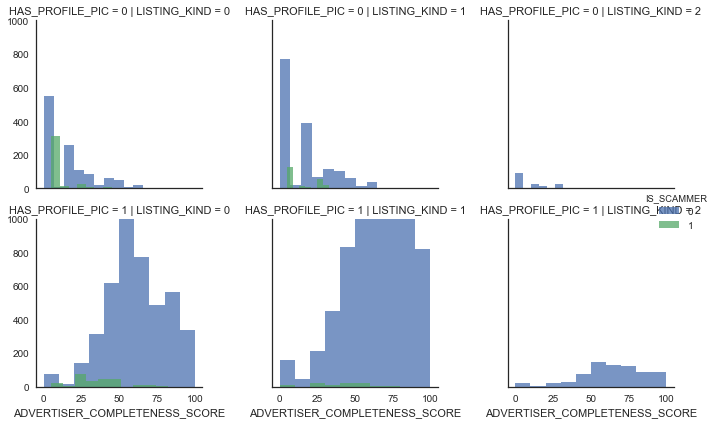

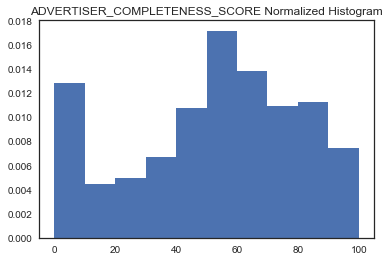

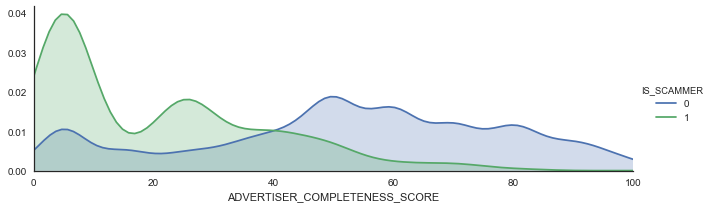

In [12]:
a = sns.FacetGrid(train, row = 'HAS_PROFILE_PIC', col = 'LISTING_KIND', hue = 'IS_SCAMMER', legend_out=True)
a.map(plt.hist, 'ADVERTISER_COMPLETENESS_SCORE', alpha = .75)
a.set(ylim=(0 , 1000))
a.add_legend()
plt.tight_layout()
plt.show()

plt.hist([train['ADVERTISER_COMPLETENESS_SCORE']], density=True)
plt.title("ADVERTISER_COMPLETENESS_SCORE Normalized Histogram")

b = sns.FacetGrid( train, hue = 'IS_SCAMMER', aspect=3 )
b.map(sns.kdeplot, 'ADVERTISER_COMPLETENESS_SCORE', shade= True )
b.set(xlim=(0 , 100))
b.add_legend()

As expected, there is a higher concentration of scammers at lower levels of *completeness score*. Also, notably, there are fewer scammers posting *shared rooms* (`LISTING_KIND = 2`) offers.


### Listing price

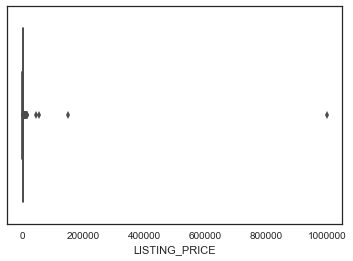

In [13]:
sns.boxplot(train['LISTING_PRICE'])
plt.show()

We can immediately see that there are some significant outliers.

In [14]:
print("LISTING_PRICE skewness: %.2f"%(train["LISTING_PRICE"].skew()))

LISTING_PRICE skewness: 123.19


Coupled with heavy distribution skewness.

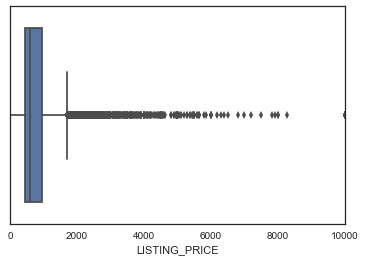

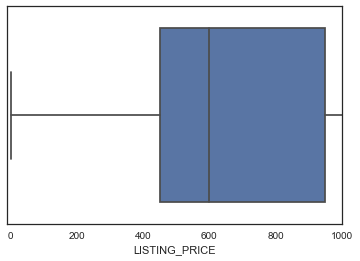

In [15]:
n_train = len(train)

sns.boxplot(x=train['LISTING_PRICE'])
plt.xlim(0 , 10000)
plt.show()
sns.boxplot(x=train['LISTING_PRICE'])
plt.xlim(-10 , 1000)
plt.show()

In [16]:
#finding number of outliers taking 6000EUR/m as threshold
n_outliers = len(train[train['LISTING_PRICE'] > 6000])

#finding the percentange of scam ads
pct_scammers = len(train[train['IS_SCAMMER'] == 1]) / n_train * 100

#finding how many of the outliers are scammers
n_scammers_outliers = len(train.loc[(train['LISTING_PRICE'] > 6000) & (train['IS_SCAMMER'] == 1)])
pct_scammers_outliers = n_scammers_outliers / n_outliers * 100

print("The difference between the percentage of scammers in price outliers and general percentage of outliers is: \n",
      round(pct_scammers_outliers - pct_scammers,2), "=", 
      round(pct_scammers_outliers, 2), " - ", 
      round(pct_scammers, 2))

The difference between the percentage of scammers in price outliers and general percentage of outliers is: 
 31.71 = 37.5  -  5.79


On closer inspection  we cannot simply remove the outliers as there is a significantly more concentration of scammers at those price levels.

We're going to deal with the outliers and skewness problems in feature engineering.

### Drawing a correlation heatmap with the available features

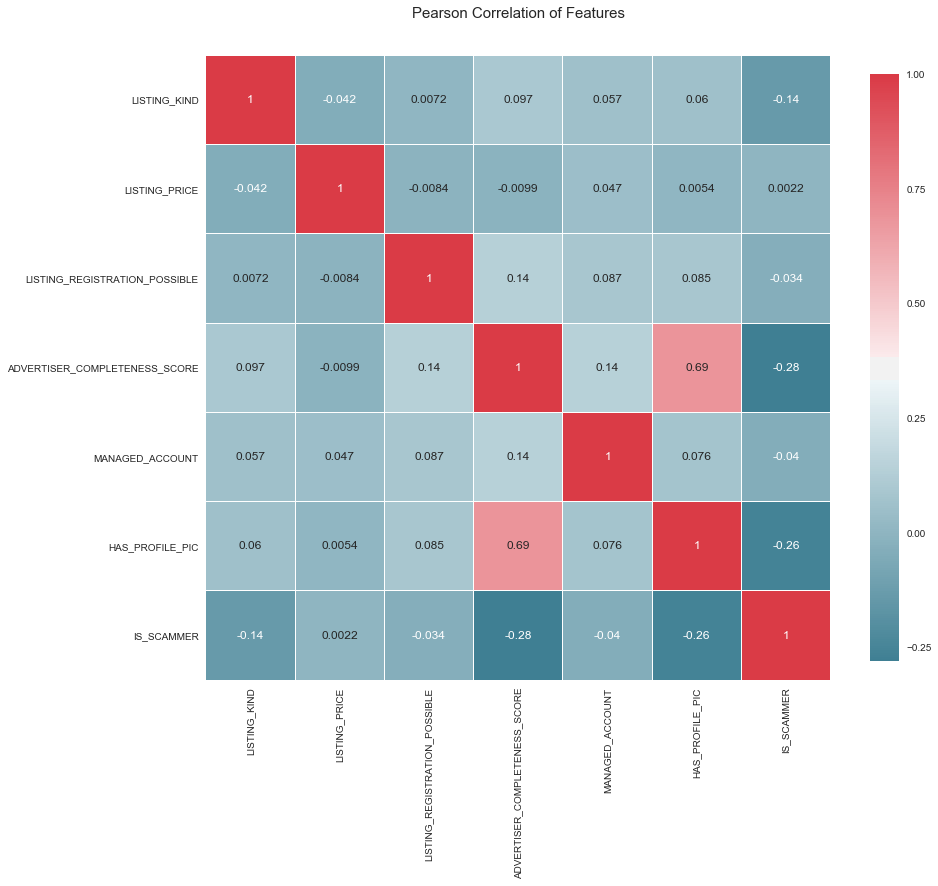

In [17]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    fig , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    fig = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

Because `HAS_PROFILE_PIC` is highly correlated with `ADVERTISER_COMPLETENESS_SCORE` we will drop it later in the features preparation process, since the completeness score should encompass more information than the profile pic presence alone.

## Feature Engineering

We're now going to make use of the available columns to generate some new features which will probably be of more use to the model than their current state.

### Feature Scaling

The **listing price** by itself probably won't tell us much, and since price is many magnitudes higher than any other feature we have to normalize/standardize it anyways. Considering the skewness found above, and the fact that this can lead to overweight very high values in the model (even if it is scaled), we should transform the data through a log function.

0.47          1
0.58          2
1.24          3
1.44          1
1.46          1
             ..
15461.59      1
43000.00      1
55000.00      1
150000.00     1
1000000.00    1
Name: LISTING_PRICE, Length: 2033, dtype: int64 
 --------------------------------------------------
-0.755023     1
-0.544727     2
 0.215111     3
 0.364643     1
 0.378436     1
             ..
 9.646114     1
 10.668955    1
 10.915088    1
 11.918391    1
 13.815511    1
Name: LISTING_PRICE_LOG, Length: 2033, dtype: int64


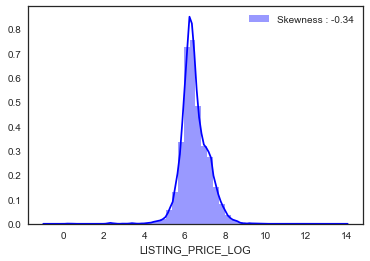

In [18]:
train["LISTING_PRICE_LOG"] = train["LISTING_PRICE"].map(lambda i: np.log(i) if i > 0 else 0)

g = sns.distplot(train["LISTING_PRICE_LOG"], color="b", label="Skewness : %.2f"%(train["LISTING_PRICE_LOG"].skew()))
g = g.legend(loc="best")

print(train["LISTING_PRICE"].value_counts().sort_index(),'\n','-'*50)
print(train["LISTING_PRICE_LOG"].value_counts().sort_index())

### Difference in pricing

One key factor that could differentiate scammers from legitimate advertisers is that difference in prices listed for the certain listing types and cities. We can use Z-scores in order to assess whether the price is fair, under/over priced or severely under/over priced

In [19]:
train_pivot = train.pivot_table(index=['LISTING_KIND','LISTING_CITY'],values='LISTING_PRICE', aggfunc=[np.mean,np.std])

for row in train.itertuples():
    mean_price_row = (train_pivot.query('LISTING_KIND == {0} and LISTING_CITY == "{1}"'.format(
        train.loc[row.Index,'LISTING_KIND'],train.loc[row.Index,'LISTING_CITY']))).iloc[0,0]
    std_price_row = (train_pivot.query('LISTING_KIND == {0} and LISTING_CITY == "{1}"'.format(
        train.loc[row.Index,'LISTING_KIND'],train.loc[row.Index,'LISTING_CITY']))).iloc[0,1]
    train.at[row.Index, 'Z_PRICE'] = (train.loc[row.Index, 'LISTING_PRICE'] - mean_price_row) / std_price_row

Some values for `'Z_PRICE'` will be missing since not every listing combination can have a standard deviation (think of a singular listing in that specific city). 
Therefore we will have to fill the missing values with a neutral value.

In [20]:
train['Z_PRICE'].fillna(0,inplace=True)

Another thing we can do is to standardize **advertiser completeness score** too.

In [21]:
mean_score = train["ADVERTISER_COMPLETENESS_SCORE"].mean()
std_score = train["ADVERTISER_COMPLETENESS_SCORE"].std()
train["ADVERTISER_COMPLETENESS_SCORE_SCALED"] = train["ADVERTISER_COMPLETENESS_SCORE"].map(
    lambda i: (i - mean_score) / std_score)

Labeling rare string elements from `LISTING_CITY`, `LOGIN_COUNTRY_CODE` and `EMAIL_DOMAIN`.

In [22]:
def process_location(train, location_column, threshold):
    """Prepare for dummy creation the locations columns by labeling rare location names

    Usage
    ------

    train = process_location(train, task, "LISTING_CITY", 20)
    """
    train_locations = train[location_column].value_counts()
    rare_locs = train_locations.combine(train_locations, max, fill_value=0)
    rare_locs = list(rare_locs.where(rare_locs < threshold).dropna().index)
    
    train[location_column+"_PROCESSED"] = train[location_column].replace(rare_locs, 'Rare')
    return train

location_columns = {'LISTING_CITY':30, 
                    'LOGIN_COUNTRY_CODE':10, 
                    'EMAIL_DOMAIN':30
                   }

for loc_col, threshold in location_columns.items():
    train = process_location(train, loc_col, threshold)
for loc_col in location_columns:   
    print(train[loc_col+"_PROCESSED"].value_counts(),'\n','-'*50)

Rare             2906
Rotterdam        1587
Berlin           1317
Barcelona        1177
Vienna           1172
                 ... 
Petaling Jaya      34
Ankara             33
Bogotá             32
Bern               32
Brescia            30
Name: LISTING_CITY_PROCESSED, Length: 70, dtype: int64 
 --------------------------------------------------
nl    2760
es    2621
it    2500
de    1936
at    1080
      ... 
tw      11
nz      11
np      10
in      10
tn      10
Name: LOGIN_COUNTRY_CODE_PROCESSED, Length: 62, dtype: int64 
 --------------------------------------------------
gmail.com              6437
Rare                   3899
hotmail.com            1608
yahoo.com               448
housinganywhere.com     422
                       ... 
aol.com                  33
interasmundo.com         32
hi.is                    30
loftly.nl                30
tiscali.it               30
Name: EMAIL_DOMAIN_PROCESSED, Length: 64, dtype: int64 
 --------------------------------------------------

### Cross-border offer placing
One possible feature can be whether or not the advertiser is loging in from another country than the listed offer's one.

In [23]:
train['DIFFERENT_COUNTRY'] = (train['LOGIN_COUNTRY_CODE'] == train['LISTING_COUNTRY_CODE']) * 1

Final check for colinearity of the features before dummies creation.

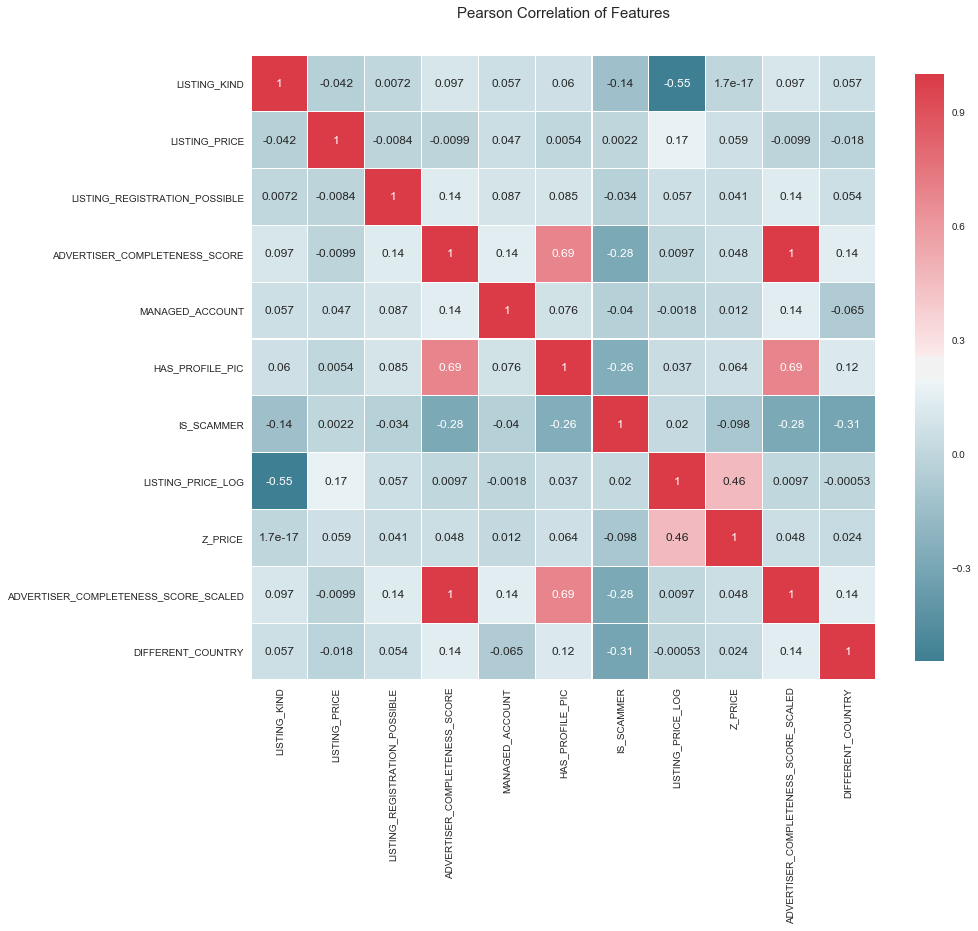

In [24]:
correlation_heatmap(train)

### Creating dummy variables

In [25]:
def create_dummies(df, column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"EMAIL_DOMAIN")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

dummy_columns = ['LISTING_KIND','LISTING_CITY_PROCESSED', 'EMAIL_DOMAIN_PROCESSED', 'LOGIN_COUNTRY_CODE_PROCESSED']

for column in dummy_columns:
    train = create_dummies(train,column)

## Model Training and Prediction

We are now going to implement the final preparations of the features in order to feed them into models.

As mentioned in the beggining of the project, we will split the data 80/20 in order to perform the final test for the chosen algorithm.

In [26]:
# Remove non-numeric columns, columns that have been feature engineered
drop_cols = ['LISTING_CITY','LOGIN_COUNTRY_CODE','LISTING_COUNTRY_CODE','BROWSER','OS',
'ANONYMISED_EMAIL','EMAIL_DOMAIN','LISTING_KIND','LISTING_PRICE','ADVERTISER_COMPLETENESS_SCORE',
'HAS_PROFILE_PIC','IS_SCAMMER','LISTING_CITY_PROCESSED','LOGIN_COUNTRY_CODE_PROCESSED','EMAIL_DOMAIN_PROCESSED']

# Gather all features and all labels in two dataframes
all_X = train.drop(drop_cols,axis=1)
all_y = train["IS_SCAMMER"]

# Split the features and labels in training- and testing- data (80/20 split or 0.2 test_size)
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, test_size=0.2, random_state=1)

print("Data split CHECK:")
if (X_train.shape[0] == y_train.shape[0]):
    print("There are both {0} rows of features and {1} rows of labels for the training set.".format(
        X_train.shape[0], y_train.shape[0]))
if (X_test.shape[0] == y_test.shape[0]):
    print("There are both {0} rows of features and {1} rows of labels for the testing set.".format(
    X_test.shape[0], y_test.shape[0]))

Data split CHECK:
There are both 13409 rows of features and 13409 rows of labels for the training set.
There are both 3353 rows of features and 3353 rows of labels for the testing set.


### Model Selection

In order to come up with viable algorithm choices, we first have to understand the problem at hand: fraud detection problems are, in fact, classification problems.

Moreover, we have an imbalanced dataset, i.e. the majority of the samples are actually negative (not a scammer).
In this scenario, classifiers can have good accuracy on the majority class but very poor accuracy on the minority class(es) due to the influence that the larger majority class. 

Additionally, the metric to be maximized depends on the business model of the company and the features and policies it promises to its customers. For instance, if we promise a site without scammers, then we should optimize for recall (predicted positives/actual positives). However, because the data is imbalanced a more suitable metric would be the ROC-AUC.

All the algorithms will be hyperparameter tuned through grid search and cross validation of 10.

Finally, for the sake of this exercise and because of time and computational constraints, I've decided to pick only four algorithms commonly used in classification problems, each from a different type of classifiers: 
- Logistic Regression (regression classifier type)
- Random Forest (ensemble method type)
- SVC (support-vector classifier, a support-vector machine type)
- MLPC (Multi-layer Perceptron classifier, an artificial neural network type)

> Caution: This step is computationally and time expensive!

In [27]:
def select_model(training_features,training_labels):
    
    # List of dictionaries, each containing a model name,
    # its estimator and a dictionary of hyperparameters for tuning
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"],
                    "C": [10, 1.0, 0.1, 0.01]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [10, 100, 1000],
                    "max_features": ["log2", "sqrt"]
                }
        },
        {
            "name": "SVC",
            "estimator": SVC(max_iter=100),
            "hyperparameters":
                {
                    "kernel": ['poly', 'rbf', 'sigmoid'],
                    "C": [10, 1.0, 0.1, 0.01],
                    "gamma": [1, 0.1, 0.01, 0.001, 0.0001]
                }
        },
        {
            "name": "MLP Classifier",
            "estimator": MLPClassifier(max_iter=100),
            "hyperparameters":
                {
                    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                    'activation': ['tanh', 'relu'],
                    'solver': ['sgd', 'adam'],
                    'alpha': [0.0001, 0.05],
                    'learning_rate': ['constant','adaptive'],
                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*30)
        scoring = {'AUC': 'roc_auc'}
        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10,
                            scoring=scoring,
                            refit='AUC')
        grid.fit(training_features,training_labels)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
    return models

result = select_model(X_train, y_train)

LogisticRegression
------------------------------
Best Score: 0.9507318253495254
Best Parameters: {'C': 1.0, 'solver': 'lbfgs'}

RandomForestClassifier
------------------------------
Best Score: 0.9677680563448815
Best Parameters: {'max_features': 'sqrt', 'n_estimators': 1000}

SVC
------------------------------
Best Score: 0.9035880348049468
Best Parameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'sigmoid'}

MLP Classifier
------------------------------
Best Score: 0.9596803509293634
Best Parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}



# Testing and Evaluating

In [114]:
model_selection = pd.DataFrame(result)
model_selection[['name','best_score','best_model']].sort_values(by="best_score",ascending=False)
# included best_model column for transparency

,name,best_score,best_model
1,RandomForestClassifier,0.967768,"(DecisionTreeClassifier(class_weight=None, cri..."
3,MLP Classifier,0.959680,"MLPClassifier(activation='relu', alpha=0.05, b..."
0,LogisticRegression,0.950732,"LogisticRegression(C=1.0, class_weight=None, d..."
2,SVC,0.903588,"SVC(C=0.01, cache_size=200, class_weight=None,..."


For transparency reasons, because the top 3 performing algorithms are possibly within standard deviations away, I will test each on the "new" data.

In [115]:
# selecting for each algorithm the best model according to optimal hyperparameters
random_forest = result[1]["best_model"]
MLP = result[3]["best_model"]
logit = result[0]["best_model"]

# predicting the "new" ads
predictions_rf = random_forest.predict(X_test)
predictions_mlp = MLP.predict(X_test)
predictions_logit = logit.predict(X_test)

In [116]:
comparison = pd.DataFrame({"IS_SCAMMER_RF":predictions_rf, 
                           "IS_SCAMMER_MLP":predictions_mlp,
                           "IS_SCAMMER_LOGIT":predictions_logit},index=X_test.index)

comparison = pd.concat([y_test, comparison],axis=1)
accuracy_rf = (comparison['IS_SCAMMER'] == comparison['IS_SCAMMER_RF']).sum()/len(y_test)
accuracy_mlp = (comparison['IS_SCAMMER'] == comparison['IS_SCAMMER_MLP']).sum()/len(y_test)
accuracy_logit = (comparison['IS_SCAMMER'] == comparison['IS_SCAMMER_LOGIT']).sum()/len(y_test)
accuracy_table = pd.DataFrame({"Model":["Random Forest","Multi-Layer Perceptron","Logistic Regression"],
                               "Accuracy":[accuracy_rf,accuracy_mlp,accuracy_logit]})
accuracy_table

,Model,Accuracy
0,Random Forest,0.972562
1,Multi-Layer Perceptron,0.964808
2,Logistic Regression,0.961825


We can see that the order is the same as in the case of training data.
Therefore, we conclude that for our problem the best algorithm from the four tested is the **Random Forest Classifier**.

An accuracy of 97.26% is a very good result, and the employment of such a model can be enhanced by setting thresholds of automatic denial (e.g. 80%+ probability to be scammer) and inspection (e.g. 50-80% scammer probability).

Further implementantion of newer algorithms can improve marginally the accuracy of the model.